In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import scipy.signal as signal
from scipy.fft import *

import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
dataset = yf.download("spy","2010-01-01")
dataset.head()
data = dataset.Close

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,89.610832,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,89.848045,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,89.911324,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,90.290825,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,90.591286,126402800


<AxesSubplot:xlabel='Date'>

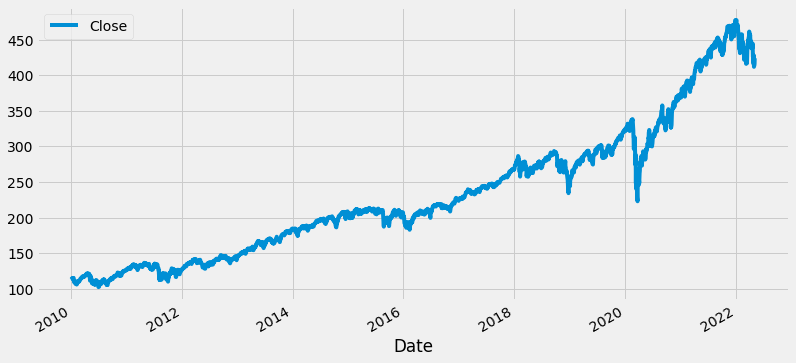

In [3]:
df = pd.DataFrame(data)
df.plot(figsize=(12,6))
data = data.values

## Detrend

<AxesSubplot:xlabel='Date'>

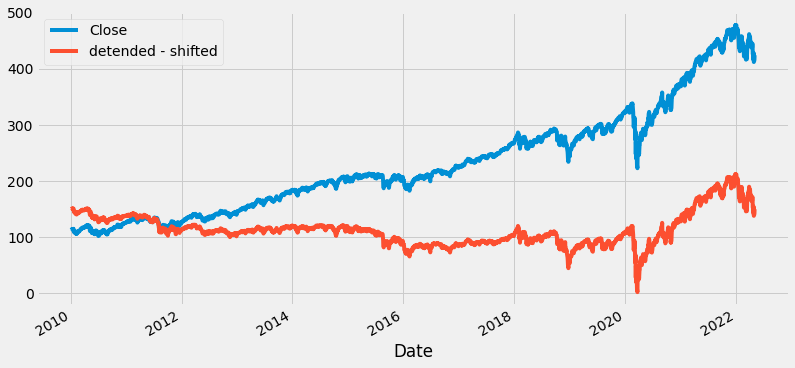

In [4]:
data_detrended = signal.detrend(data)

# df['detended'] = data_detrended
df['detended - shifted'] = data_detrended + df.Close.values[0]
df.plot(figsize=(12,6))

## Discrete Fourier transform via FFT


In [7]:
smoothed = df.Close.rolling(window=3).mean().dropna()
smoothed = smoothed.values

# use only real numbers... 
# data_fft = fft(smoothed, workers=-1)
data_fft = rfft(smoothed, workers=-1)
data_fft[:10]

array([ 7.19568800e+05     +0.j        ,  3.88697807e+04+137790.76048955j,
        2.31856310e+04 +86142.6829184j ,  2.45183152e+04 +58594.35509504j,
       -1.37992882e+03 +54123.22083023j, -6.14820453e+01 +40366.09423464j,
       -5.63783632e+03 +35207.25182766j, -5.84611703e+03 +27728.23130272j,
       -5.45912409e+03 +18558.11879487j,  2.91687298e+03 +18445.66519531j])

<Figure size 864x432 with 0 Axes>

C:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


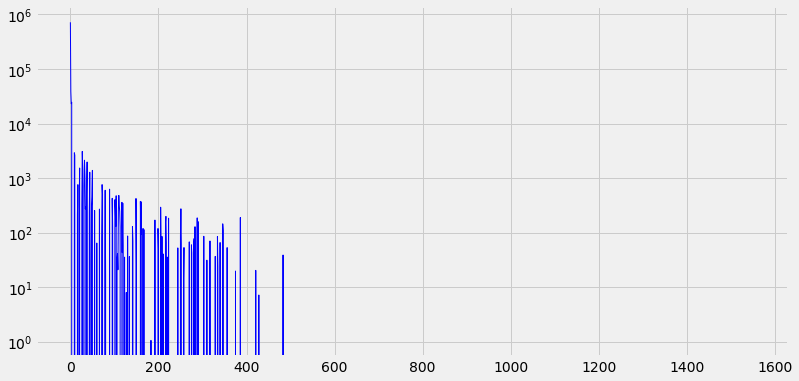

<Figure size 864x432 with 0 Axes>

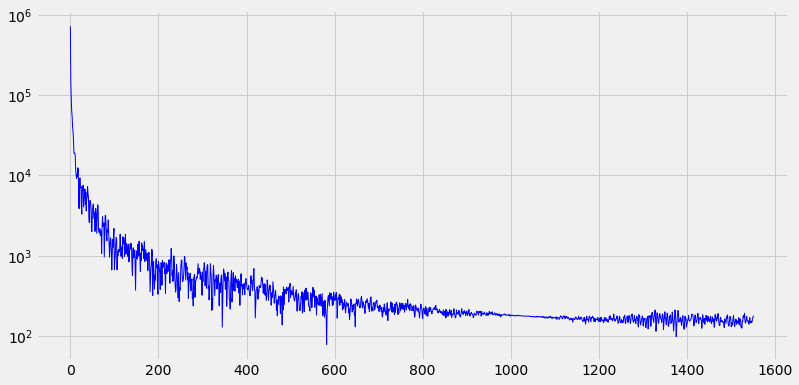

In [8]:
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.show()

<Figure size 864x432 with 0 Axes>

C:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'data_fft')

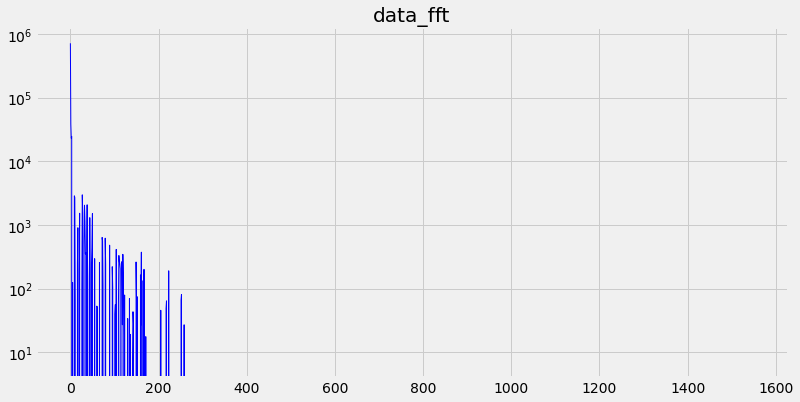

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'abs(data_fft)')

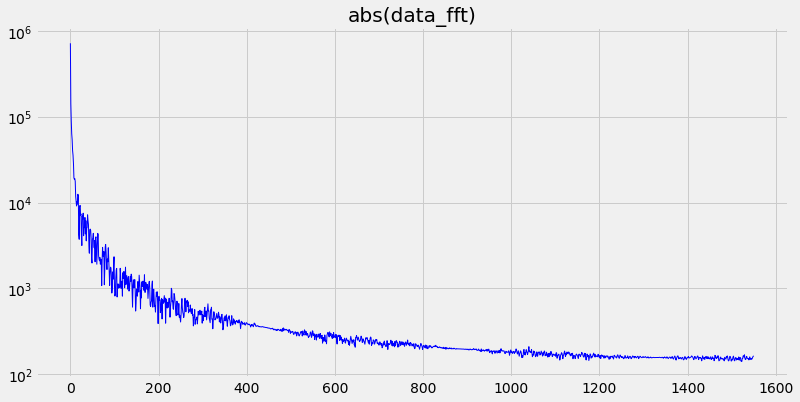

In [9]:
smoothed = df.Close.rolling(window=7).mean().dropna()
smoothed = smoothed.values

# use only real numbers... 
# data_fft = fft(smoothed, workers=-1)
data_fft = rfft(smoothed, workers=-1)

plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.title('data_fft')
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.title('abs(data_fft)')
plt.show()

<Figure size 864x432 with 0 Axes>

C:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


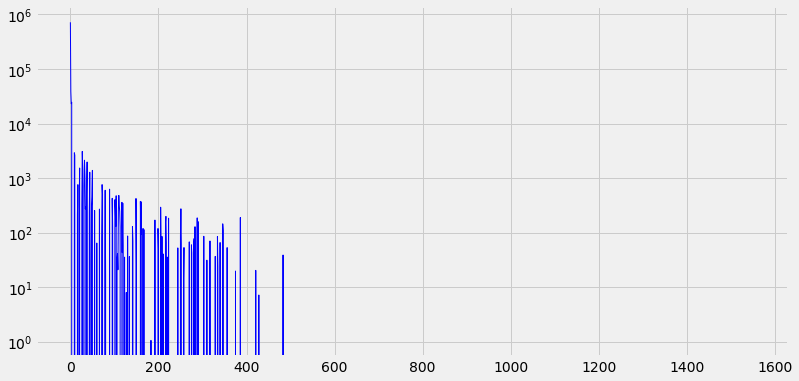

<Figure size 864x432 with 0 Axes>

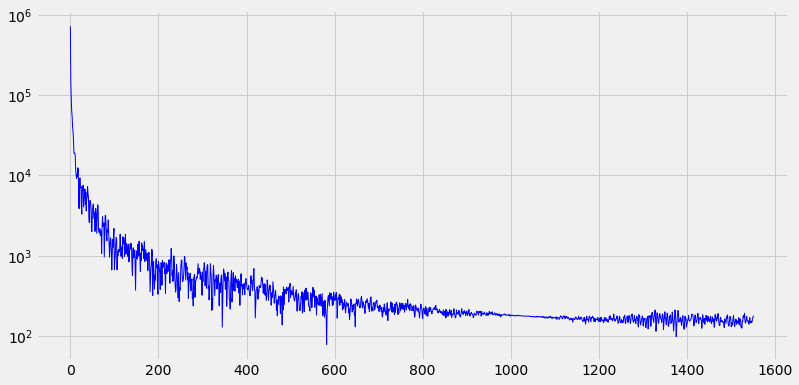

In [10]:
smoothed = df.Close.rolling(window=3).mean().dropna()
smoothed = smoothed.values # to NP array

data_fft = rfft(smoothed, workers=-1)
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.show()

In [11]:
# np.sort(np.abs(data_fft))[::-1][:10]

<AxesSubplot:xlabel='Date'>

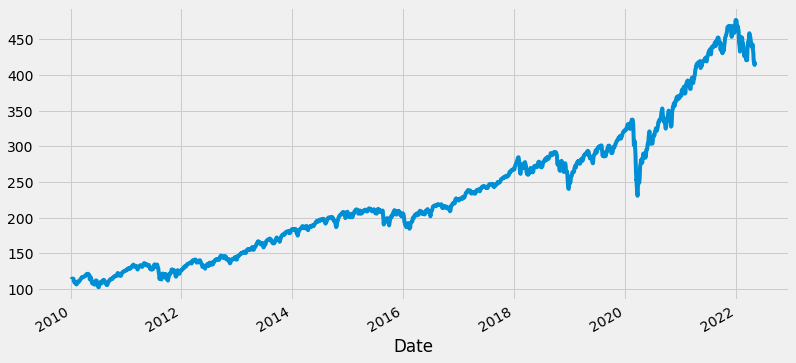

In [12]:
df.Close.rolling(window=3).mean().dropna().plot(figsize=(12,6))

### FFT of daily change

<AxesSubplot:xlabel='Date'>

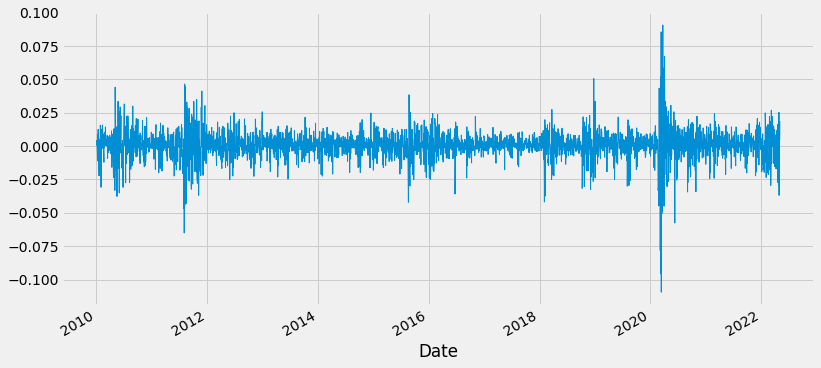

In [13]:
# daily_change = data[:-1] / data[1:] -1 
# data / dataset.Close.shift(-1) - 1
daily_change = dataset.Close.shift(-1) / data - 1
daily_change.plot(figsize=(12,6),linewidth = 1.0)
daily_change = daily_change.values

In [14]:
# check calculatation isnt inverter. might need to * -1 
print(data[:10])
print(daily_change[:10])

[113.33000183 113.62999725 113.70999908 114.19000244 114.56999969
 114.73000336 113.66000366 114.62000275 114.93000031 113.63999939]
[ 0.0026471   0.00070406  0.00422129  0.00332776  0.00139656 -0.00932624
  0.00844623  0.00270457 -0.01122423  0.01249558]


<Figure size 864x432 with 0 Axes>

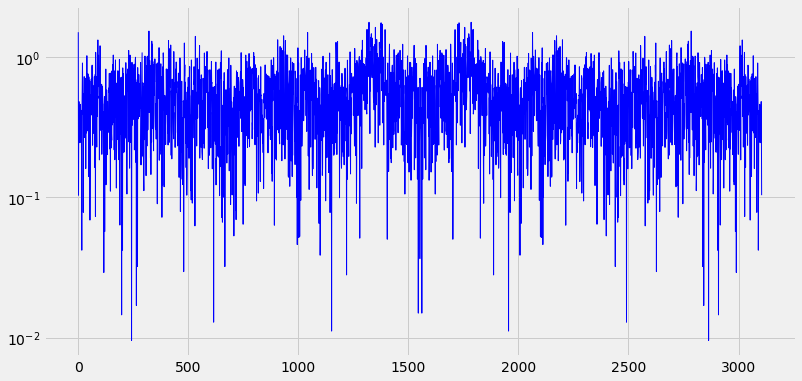

In [15]:
daily_change[np.isnan(daily_change)] = 0
daily_change_fft = fft(daily_change)

plt.figure(figsize=(12,6))
plt.semilogy(abs(daily_change_fft), '-b', linewidth = 1.0)
plt.show()

## Power Spectral Density

> The power spectral density, PSD, describes how the power of your signal is distributed over frequency whilst the DFT shows the spectral content of your signal, the amplitude and phase of harmonics in your signal.

> You pick one or the other depending on what you want to observe/analyze. And no they're not the same as you can see from the equations above and links given. Their spectra are generally not the same. One is estimated as the squared magnitude of the other.


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'frequency [Hz]')

Text(0, 0.5, 'PSD [V**2/Hz]')

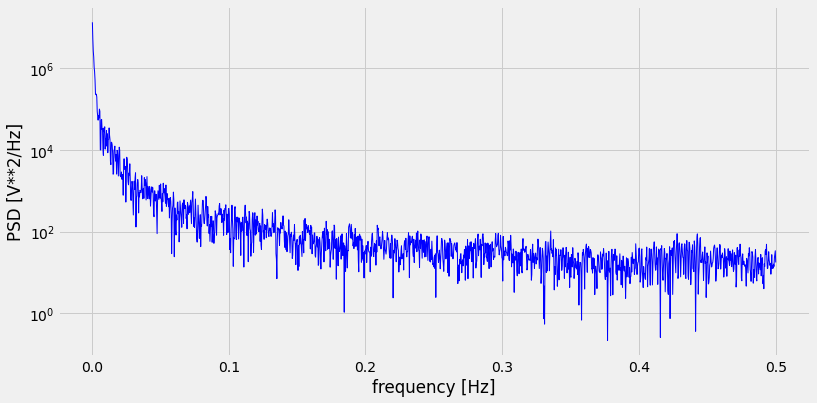

In [16]:
freq, psd = signal.periodogram(data)

plt.figure(figsize=(12,6))
plt.semilogy(freq[1:],psd[1:], '-b', linewidth = 1.0)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [17]:
# def test():
#     fft(data.values, workers=2)

# if __name__ == '__main__':
#     import timeit
#     print(timeit.timeit("test()", setup="from __main__ import test", number = 25000))